In [1]:
# As respostas ao exercício encontram-se no final deste documento.


# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [2]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

In [4]:
anos=data.year.unique()

<IPython.core.display.Javascript object>


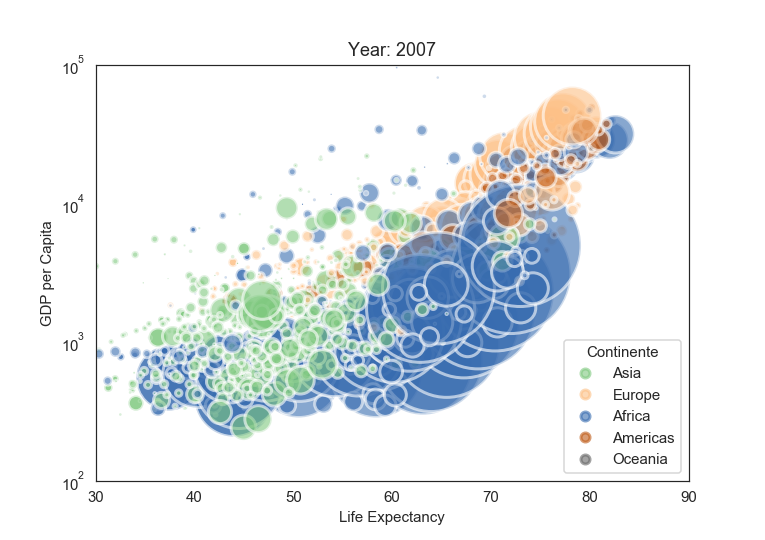

In [6]:
%matplotlib notebook
%matplotlib notebook

# initialize a figure
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    ###>_________________________________________________________________________________________________________________________
    ###>Inserir uma legenda ou legendas com a cor das “bolhas”
    ###>e o seu significado, posicionada(s) em área(s) que não
    ###>se sobreponha(m) às “bolhas”. Fundamente as opções tomadas.
    ###>
   
    Legenda_Continentes= ax.legend(labels = data["continent"].unique(), handles =scut.legend_elements () [0], loc=4, title= "Continente")  
    
    ###
    ###>________________________________________________________________________________________________________________________
    
    

ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
    
plt.show()


**Questão A: – Explique a metodologia para criar a animação em cada um dos casos
(versões). Comente-as. Justifique.**

Em primeiro lugar devem ser importadas as bibliotecas que vão ser necessárias para a realização do trabalho, pandas/matplotlib/numpy/seaborn assim como definir a cor de fundo e o tamanho da figura como my_dpi=96. 
De seguida, com o url vai-se buscar os dados a um site ou plataforma para o programa ler estes dados. A tabela apresenta uma coluna com o nome do país ("country"), seguindo-se as restantes: ano ("year"), população ("pop"), continente ("continent"), esperança média de vida ("lifeExp") e PIB per capita ("gdpPercap").
 
A cada Continente (coluna "continente"), sendo atribuído a cada continente um número. É atribuído os dados da coluna year na variável anos. O autor começa por definir que para cada ano será criada uma imagem com as caraterísticas definidas por ele, originando uma figura com o tamanho de 680x480 dpi.

Para cada ano será criado um "marcador" situado de acordo com a esperança média de vida e PIB per capita correspondente, em que o seu tamanho será baseado pelo racio do número de população correspondente e agrupados por continente, de forma a facilitar o reconhecimento. 

O gráfico denomina-se "Year: (i)", sendo i o ano referente ao frame apresentado: o título muda à medida que os anos passam, referindo sempre o ano correspondente. 

A cor é definida pela colormap "accent", definindo o processamento da imagem através do alpha para 0,6. Deste modo, a largura da linha do marcador será 2 e de cor branca. 

Nas linhas seguintes, define uma escala e nomeia que (x) corresponde à "Life Expectancy" e o (y) ao "GDP per Capita". Define os limite de cada eixo (y), desde 100 até 100000 e o eixo (x) de 30 a 90. 
 
Define ainda uma função a fim de guardar as imagem. A animação é representada com o codigo ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)

Usando o programa Imagemagick, teríamos que converter as imagens guardadas para gif, criando, assim, a animação desejada. Sendo que o número de frames da animação é atribuído pelo número de anos existentes, dados pela variável "anos", com o intervalo em cada frame de 200s, não permitindo a repetição da animação.
Por fim, é pedido que se inicie a animação.

**Questão B:– Temos “bolhas” de cinco (5) cores diferentes. O que representa cada
cor? Justifique, com descrição detalhada do processo.**

Cada bolha apresenta uma cor, sendo que essa cor é atribuída a um continente, definida pela caracterização do marcador.
Tudo isto acontece porque cada continente passa a ter a sua própia caracterização, sendo (0=Ásia, 1=Europa, 2=África, 3=América, 4=Oceânia). O tamanho das bolhas representa a densidade populacional, quanto maior a bolha, maior a população.
No código da animação, o marcador é definido por c=tmp['continent'].cat.codes, que agrupa as "bolhas" por continente. Consequentente, bolhas de cor igual são o mesmo continente.

**Questão C:– Inserir uma legenda ou legendas com a cor das “bolhas” e o seu
significado, posicionada(s) em área(s) que não se sobreponha(m) às “bolhas”. Fundamente as
opções tomadas.**

No início do documento, encontra-se o código realizado para a criação da legenda: Legenda_Continentes= ax.legend(labels = data["continent"].unique(), handles =scut.legend_elements () [0], loc=4, title= "Continente"). Para além disso, acresecentei um título na legenda com title="Continente".
As cores utilizadas são as mesmas que as utilizadas nas bolhas. A legenda é referente aos diferentes continentes. 
Ao usarmos o "loc=4" definimos que a legenda se irá encontrar no canto inferiror direito e o  "handles" faz com que a legenda distinga os dados representados e reconheça os elementos configurados.